In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=3,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(0))

#### Initializing the model

In [3]:
test_GMM = GMM_Constrainted(data)

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3,scale=0.5)
print(init_params) 
#### Notice how only a single set of 'sqrt_covs' matrices have been initialized as here all the components share the same covariance

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'sqrt_covs': array([[1., 0.],
       [0., 1.]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.8 and learning rate = 9e-4
params_store = test_GMM.fit(init_params,"grad_descent", learning_rate = 0.0009, mass = 0.8, maxiter = 100) 

Log likelihood -720.8092616186832
Log likelihood -713.8910013012256
Log likelihood -702.1958338726993
Log likelihood -688.2919666478815
Log likelihood -675.2823078440513
Log likelihood -666.5030146185011
Log likelihood -664.031879949132
Log likelihood -666.0491930198807
Log likelihood -666.9097879692818
Log likelihood -663.5416942201681
Log likelihood -658.8410584727724
Log likelihood -656.1822817270358
Log likelihood -655.9076644742253
Log likelihood -656.7283090975618
Log likelihood -657.4636940077586
Log likelihood -657.6045582599806
Log likelihood -657.2151833894803
Log likelihood -656.646931166686
Log likelihood -656.2469514067095
Log likelihood -656.1509787800867
Log likelihood -656.2430409113254
Log likelihood -656.3005158643217
Log likelihood -656.1967074174463
Log likelihood -655.9754658780907
Log likelihood -655.7613378601483
Log likelihood -655.6368058913611
Log likelihood -655.6006199196472
Log likelihood -655.603129241011
Log likelihood -655.5977650846362
Log likelihood -6

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params,input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt in zip(*unpacked_params):
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2*np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], 'k.')
    ax.plot(input_data[:, 0], input_data[:, 1], 'k.')

    plt.show()
    

likelihood -720.8092616186832
aic,bic 1463.6185232373664 1504.3601304585845


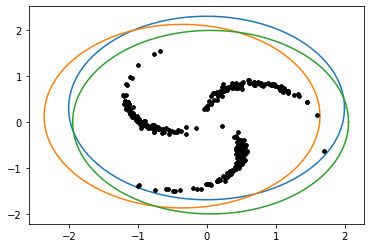

mpkl 0.0
likelihood -713.8910013012256
aic,bic 1449.7820026024513 1490.5236098236694


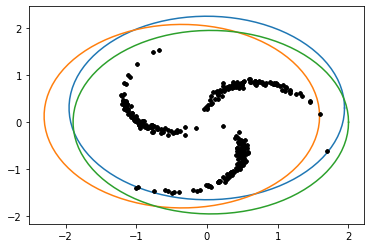

mpkl 0.0
likelihood -702.1958338726993
aic,bic 1426.3916677453985 1467.1332749666167


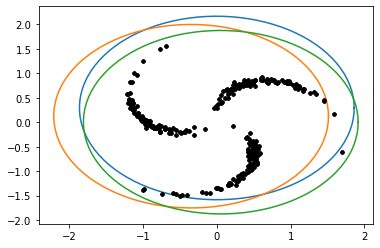

mpkl 0.0
likelihood -688.2919666478815
aic,bic 1398.583933295763 1439.3255405169812


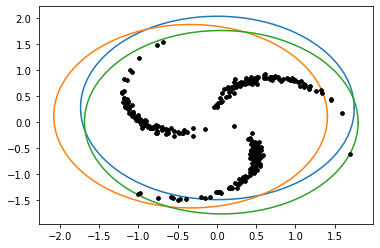

mpkl 0.0
likelihood -675.2823078440513
aic,bic 1372.5646156881025 1413.3062229093207


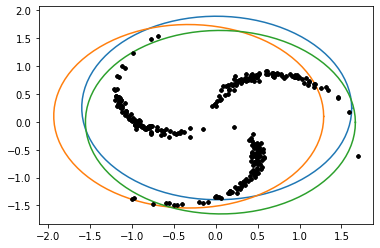

mpkl 0.0
likelihood -666.5030146185011
aic,bic 1355.0060292370022 1395.7476364582203


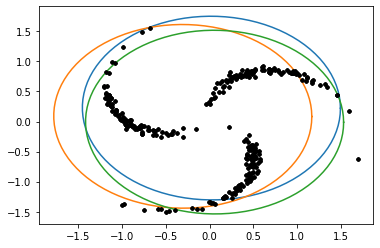

mpkl 0.0
likelihood -664.031879949132
aic,bic 1350.063759898264 1390.805367119482


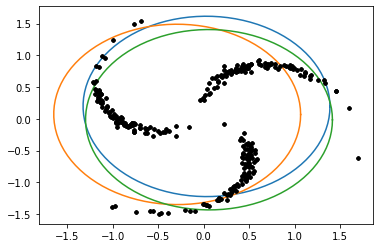

mpkl 0.0
likelihood -666.0491930198807
aic,bic 1354.0983860397614 1394.8399932609796


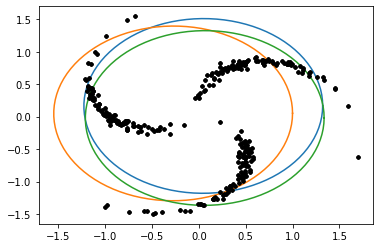

mpkl 0.0
likelihood -666.9097879692818
aic,bic 1355.8195759385635 1396.5611831597816


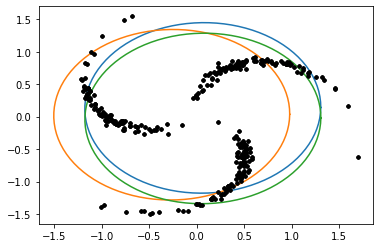

mpkl 0.0
likelihood -663.5416942201681
aic,bic 1349.0833884403362 1389.8249956615543


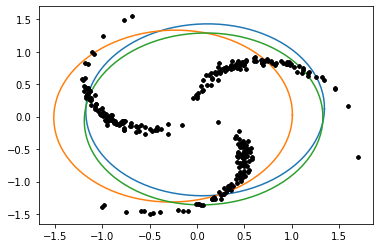

mpkl 0.0
likelihood -658.8410584727724
aic,bic 1339.6821169455447 1380.423724166763


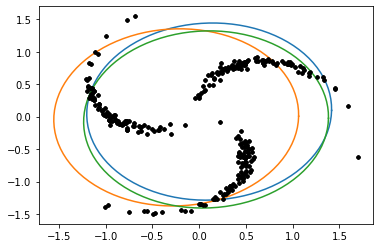

mpkl 0.0
likelihood -656.1822817270358
aic,bic 1334.3645634540717 1375.1061706752898


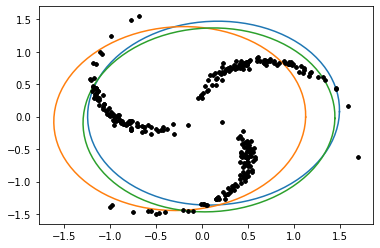

mpkl 0.0
likelihood -655.9076644742253
aic,bic 1333.8153289484505 1374.5569361696687


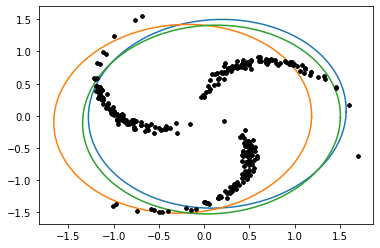

mpkl 0.0
likelihood -656.7283090975618
aic,bic 1335.4566181951236 1376.1982254163418


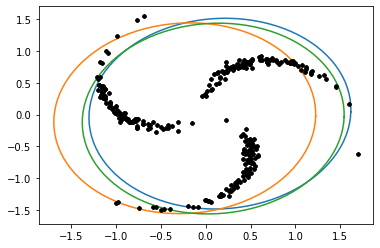

mpkl 0.0
likelihood -657.4636940077586
aic,bic 1336.9273880155172 1377.6689952367353


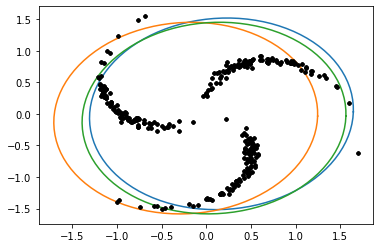

mpkl 0.0
likelihood -657.6045582599806
aic,bic 1337.2091165199613 1377.9507237411794


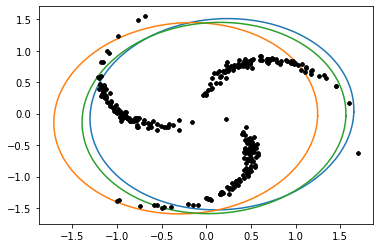

mpkl 0.0
likelihood -657.2151833894803
aic,bic 1336.4303667789607 1377.1719740001788


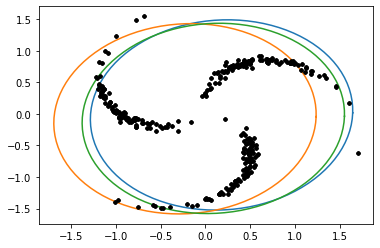

mpkl 0.0
likelihood -656.646931166686
aic,bic 1335.293862333372 1376.0354695545902


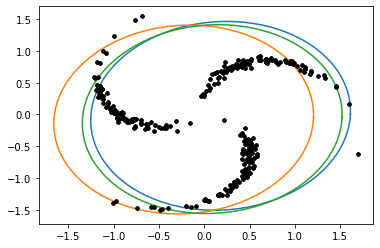

mpkl 0.0
likelihood -656.2469514067095
aic,bic 1334.493902813419 1375.2355100346372


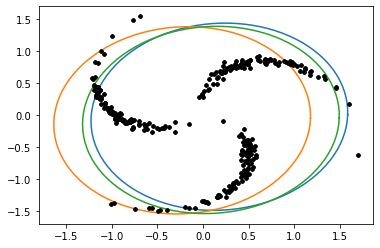

mpkl 0.0
likelihood -656.1509787800867
aic,bic 1334.3019575601734 1375.0435647813915


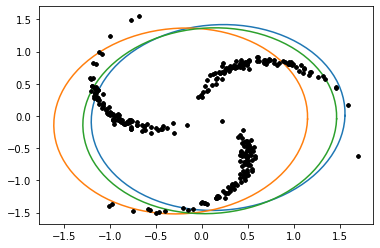

mpkl 0.0
likelihood -656.2430409113254
aic,bic 1334.4860818226507 1375.2276890438688


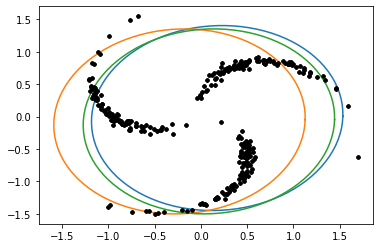

mpkl 0.0
likelihood -656.3005158643217
aic,bic 1334.6010317286434 1375.3426389498616


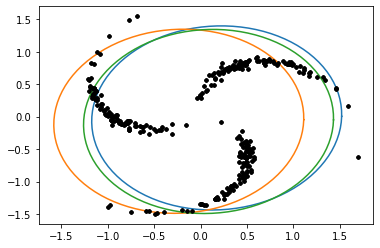

mpkl 0.0
likelihood -656.1967074174463
aic,bic 1334.3934148348926 1375.1350220561108


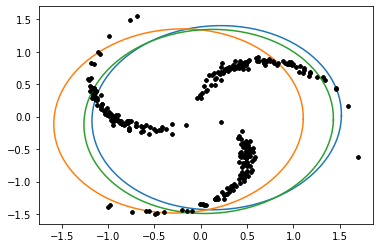

mpkl 0.0
likelihood -655.9754658780907
aic,bic 1333.9509317561815 1374.6925389773996


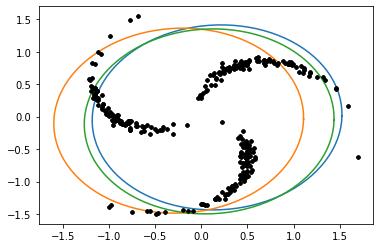

mpkl 0.0
likelihood -655.7613378601483
aic,bic 1333.5226757202965 1374.2642829415147


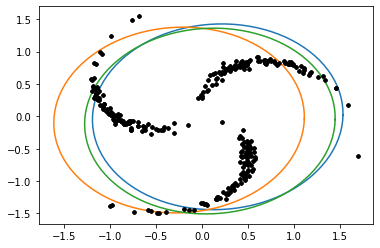

mpkl 0.0
likelihood -655.6368058913611
aic,bic 1333.2736117827221 1374.0152190039403


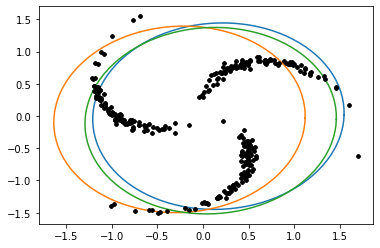

mpkl 0.0
likelihood -655.6006199196472
aic,bic 1333.2012398392944 1373.9428470605126


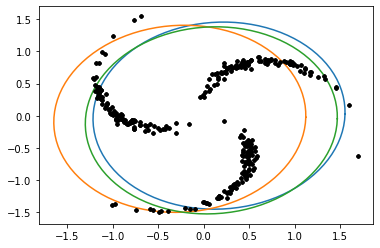

mpkl 0.0
likelihood -655.603129241011
aic,bic 1333.206258482022 1373.94786570324


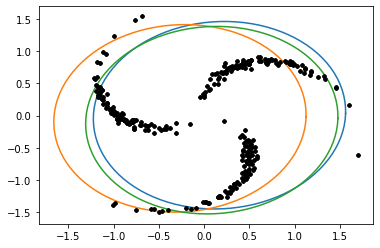

mpkl 0.0
likelihood -655.5977650846362
aic,bic 1333.1955301692724 1373.9371373904905


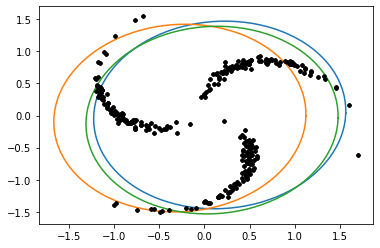

mpkl 0.0
likelihood -655.5676268603831
aic,bic 1333.1352537207663 1373.8768609419844


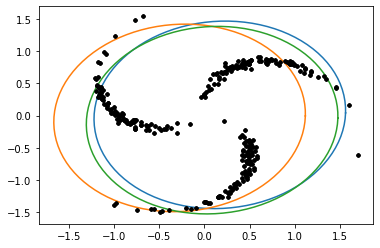

mpkl 0.0
likelihood -655.5223417167549
aic,bic 1333.0446834335098 1373.786290654728


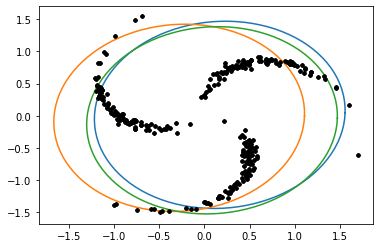

mpkl 0.0
likelihood -655.4799116729803
aic,bic 1332.9598233459606 1373.7014305671787


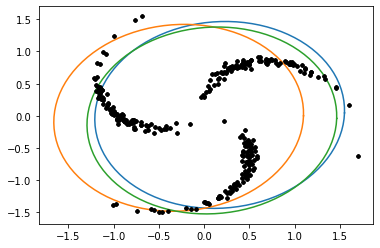

mpkl 0.0
likelihood -655.4504396469138
aic,bic 1332.9008792938275 1373.6424865150457


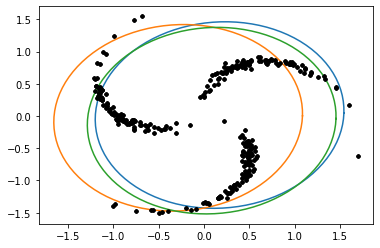

mpkl 0.0
likelihood -655.4311881007607
aic,bic 1332.8623762015213 1373.6039834227395


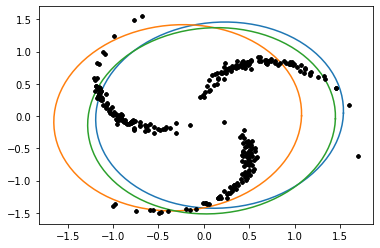

mpkl 0.0
likelihood -655.4122925713627
aic,bic 1332.8245851427255 1373.5661923639436


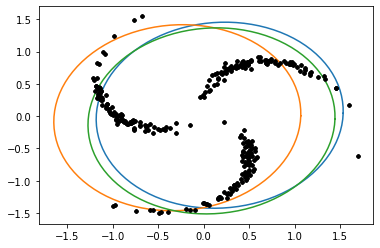

mpkl 0.0
likelihood -655.3856622584874
aic,bic 1332.7713245169748 1373.512931738193


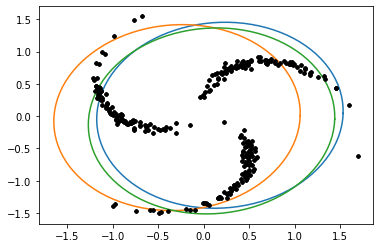

mpkl 0.0
likelihood -655.3497202422616
aic,bic 1332.6994404845232 1373.4410477057413


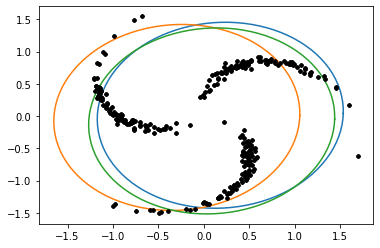

mpkl 0.0
likelihood -655.307994943531
aic,bic 1332.615989887062 1373.35759710828


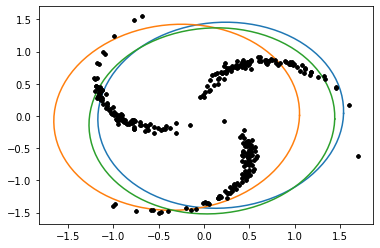

mpkl 0.0
likelihood -655.2647129438474
aic,bic 1332.5294258876947 1373.271033108913


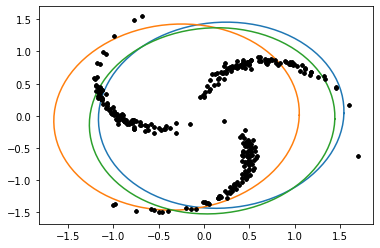

mpkl 0.0
likelihood -655.221562314051
aic,bic 1332.443124628102 1373.18473184932


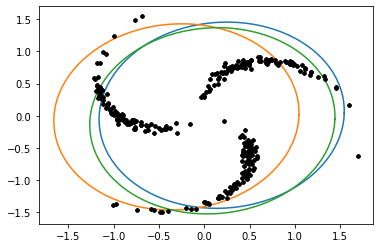

mpkl 0.0
likelihood -655.1773716498817
aic,bic 1332.3547432997634 1373.0963505209816


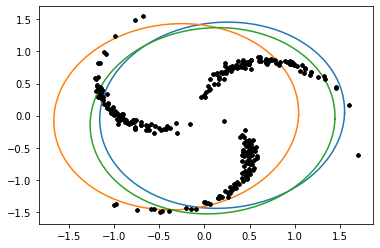

mpkl 0.0
likelihood -655.1297376102463
aic,bic 1332.2594752204925 1373.0010824417107


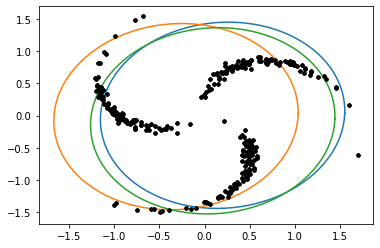

mpkl 0.0
likelihood -655.076715530241
aic,bic 1332.153431060482 1372.8950382817002


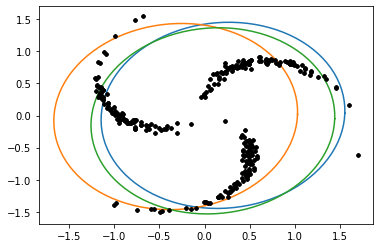

mpkl 0.0
likelihood -655.0174292161702
aic,bic 1332.0348584323403 1372.7764656535585


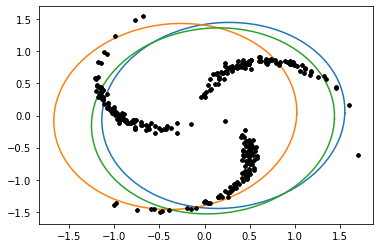

mpkl 0.0
likelihood -654.9516352237041
aic,bic 1331.9032704474082 1372.6448776686263


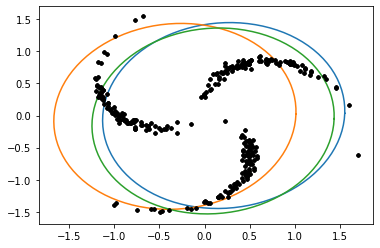

mpkl 0.0
likelihood -654.8789375314541
aic,bic 1331.7578750629082 1372.4994822841263


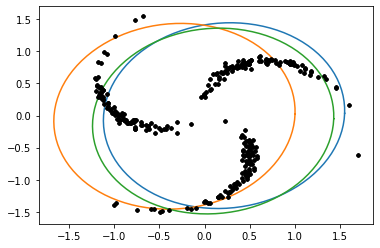

mpkl 0.0
likelihood -654.7982877073644
aic,bic 1331.5965754147287 1372.3381826359469


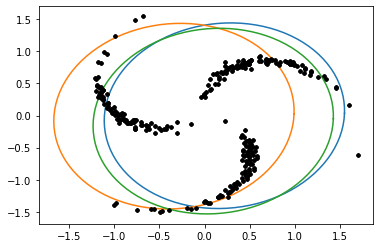

mpkl 0.0
likelihood -654.7079566009697
aic,bic 1331.4159132019395 1372.1575204231576


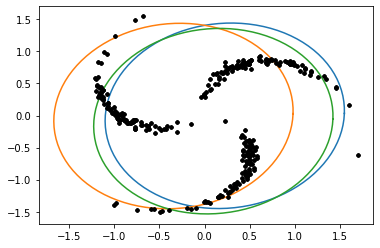

mpkl 0.0
likelihood -654.6057669559475
aic,bic 1331.211533911895 1371.9531411331131


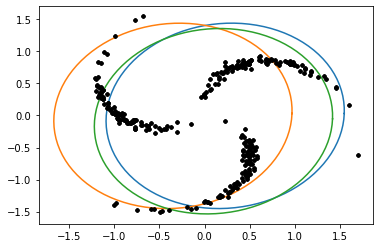

mpkl 0.0
likelihood -654.4892677029925
aic,bic 1330.978535405985 1371.7201426272031


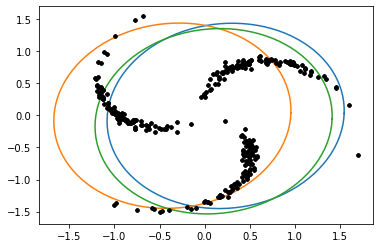

mpkl 0.0
likelihood -654.3556685211792
aic,bic 1330.7113370423583 1371.4529442635765


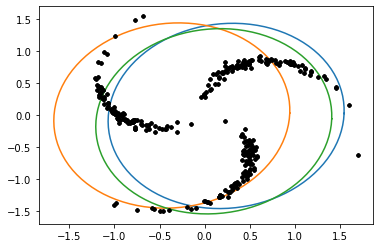

mpkl 0.0
likelihood -654.2015479016843
aic,bic 1330.4030958033686 1371.1447030245868


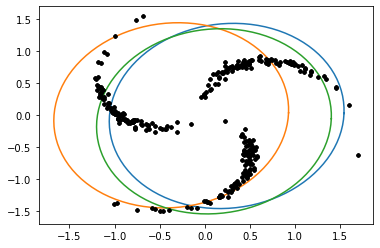

mpkl 0.0
likelihood -654.0224424330945
aic,bic 1330.044884866189 1370.7864920874072


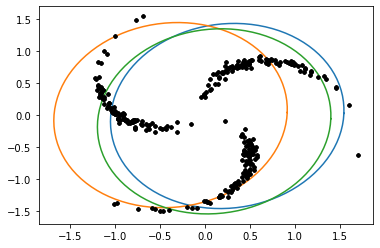

mpkl 0.0
likelihood -653.8123871302296
aic,bic 1329.6247742604592 1370.3663814816773


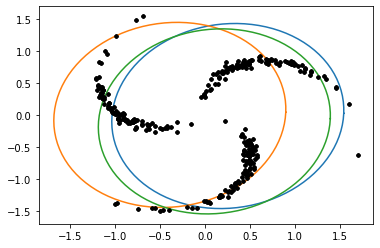

mpkl 0.0
likelihood -653.5633697324237
aic,bic 1329.1267394648473 1369.8683466860655


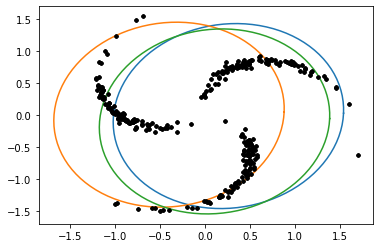

mpkl 0.0
likelihood -653.2645597007911
aic,bic 1328.5291194015822 1369.2707266228003


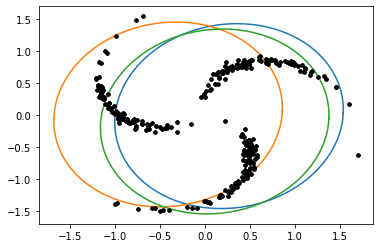

mpkl 0.0
likelihood -652.9010970969645
aic,bic 1327.802194193929 1368.543801415147


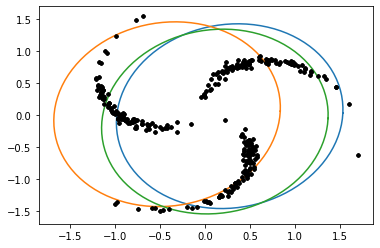

mpkl 0.0
likelihood -652.4521386299454
aic,bic 1326.9042772598907 1367.6458844811089


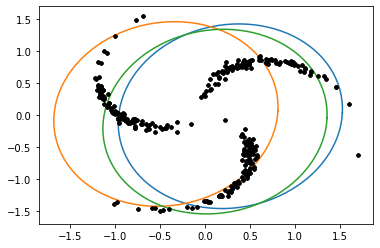

mpkl 0.0
likelihood -651.8876782310762
aic,bic 1325.7753564621523 1366.5169636833705


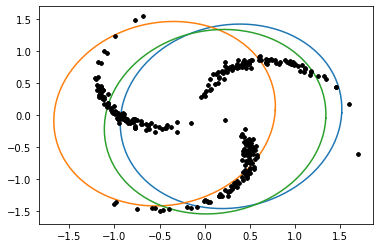

mpkl 0.0
likelihood -651.1632743920534
aic,bic 1324.3265487841068 1365.068156005325


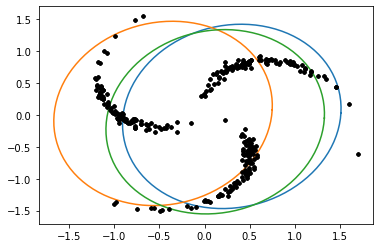

mpkl 0.0
likelihood -650.211040859507
aic,bic 1322.422081719014 1363.163688940232


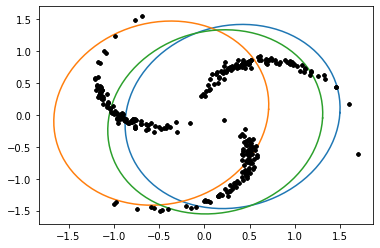

mpkl 0.0
likelihood -648.9237315417923
aic,bic 1319.8474630835847 1360.5890703048028


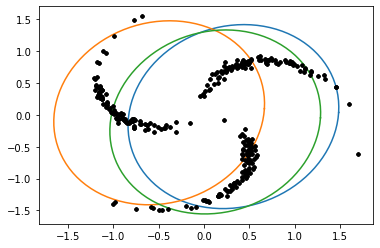

mpkl 0.0
likelihood -647.1257869477217
aic,bic 1316.2515738954435 1356.9931811166616


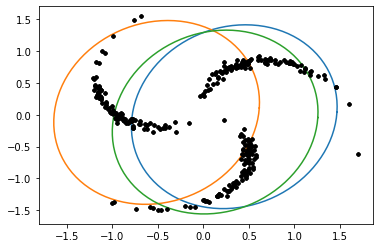

mpkl 0.0
likelihood -644.5198338887747
aic,bic 1311.0396677775493 1351.7812749987675


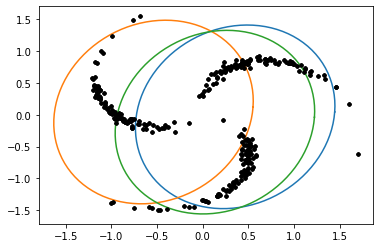

mpkl 0.0
likelihood -640.5901688360628
aic,bic 1303.1803376721257 1343.9219448933438


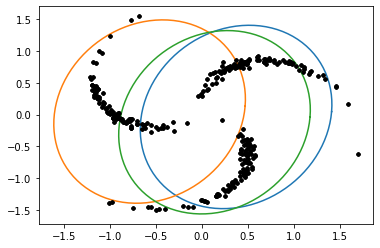

mpkl 0.0
likelihood -634.4538784214908
aic,bic 1290.9077568429816 1331.6493640641997


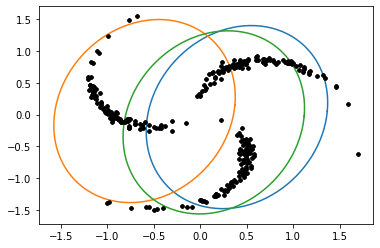

mpkl 0.0
likelihood -624.7894042555752
aic,bic 1271.5788085111503 1312.3204157323685


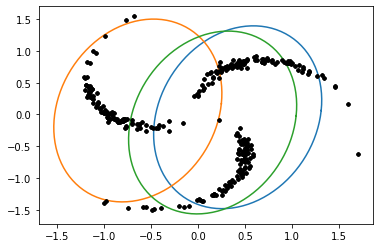

mpkl 0.0
likelihood -610.705428117376
aic,bic 1243.410856234752 1284.15246345597


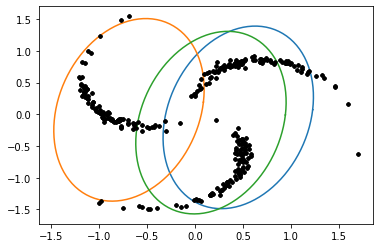

mpkl 0.0
likelihood -595.8929753952139
aic,bic 1213.7859507904277 1254.5275580116459


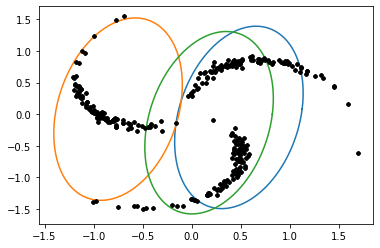

mpkl 0.0
likelihood -590.0503010612799
aic,bic 1202.1006021225598 1242.842209343778


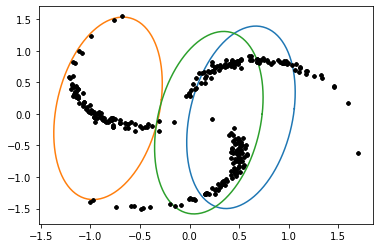

mpkl 0.0
likelihood -585.8737207993382
aic,bic 1193.7474415986765 1234.4890488198946


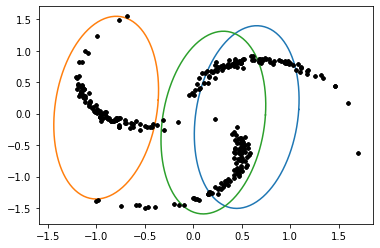

mpkl 0.0
likelihood -588.0738130399616
aic,bic 1198.1476260799232 1238.8892333011413


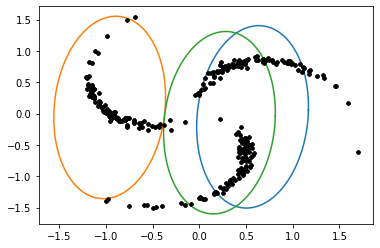

mpkl 0.0
likelihood -592.5696408764356
aic,bic 1207.1392817528713 1247.8808889740894


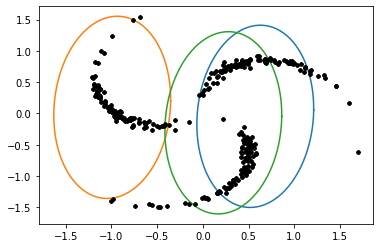

mpkl 0.0
likelihood -592.0752101465773
aic,bic 1206.1504202931546 1246.8920275143728


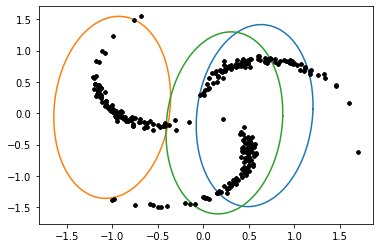

mpkl 0.0
likelihood -588.1870615453906
aic,bic 1198.3741230907813 1239.1157303119994


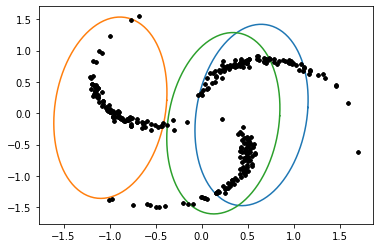

mpkl 0.0
likelihood -585.441273189029
aic,bic 1192.882546378058 1233.624153599276


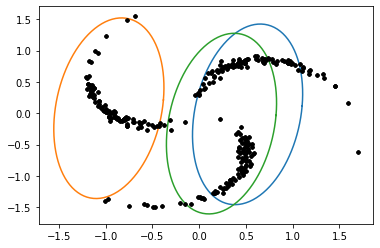

mpkl 0.0
likelihood -583.6621756210948
aic,bic 1189.3243512421896 1230.0659584634077


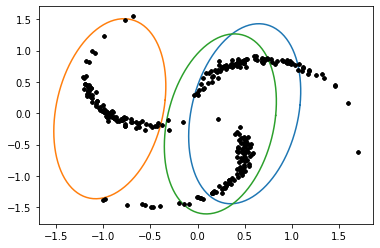

mpkl 0.0
likelihood -582.6830779146201
aic,bic 1187.3661558292401 1228.1077630504583


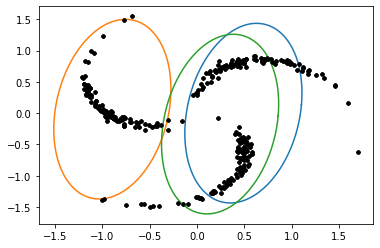

mpkl 0.0
likelihood -583.1128046980822
aic,bic 1188.2256093961644 1228.9672166173825


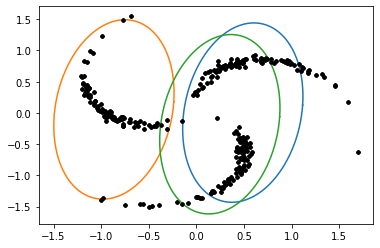

mpkl 0.0
likelihood -583.1940824866161
aic,bic 1188.3881649732323 1229.1297721944504


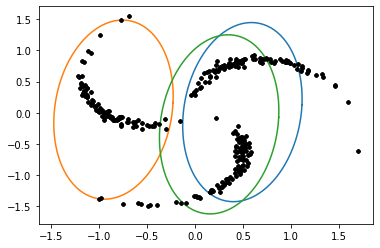

mpkl 0.0
likelihood -582.844411266406
aic,bic 1187.688822532812 1228.4304297540302


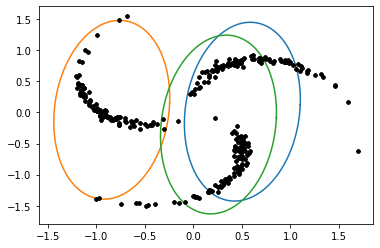

mpkl 0.0
likelihood -582.4307430330487
aic,bic 1186.8614860660973 1227.6030932873155


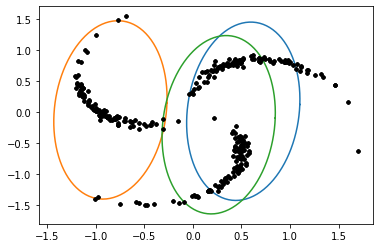

mpkl 0.0
likelihood -581.6988089488693
aic,bic 1185.3976178977387 1226.1392251189568


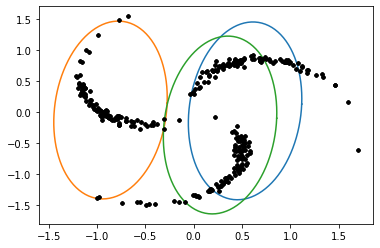

mpkl 0.0
likelihood -581.2909943893961
aic,bic 1184.5819887787923 1225.3235960000104


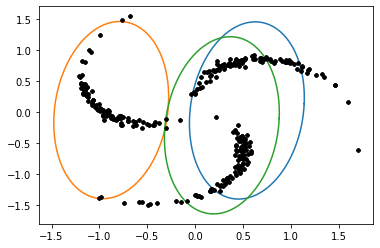

mpkl 0.0
likelihood -581.1848325806087
aic,bic 1184.3696651612174 1225.1112723824356


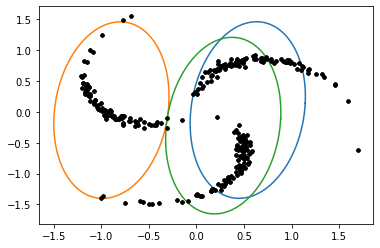

mpkl 0.0
likelihood -581.0255378482977
aic,bic 1184.0510756965955 1224.7926829178136


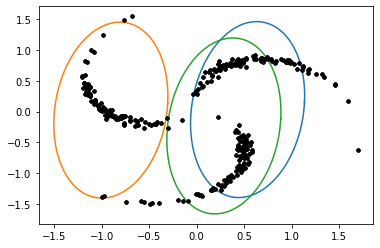

mpkl 0.0
likelihood -580.9109741159424
aic,bic 1183.8219482318848 1224.563555453103


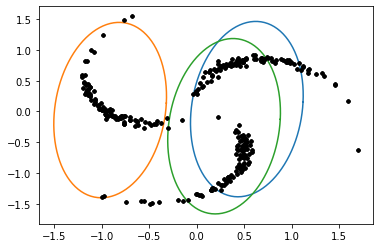

mpkl 0.0
likelihood -580.7769545613996
aic,bic 1183.5539091227993 1224.2955163440174


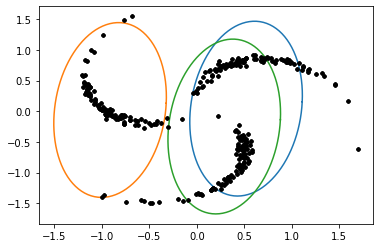

mpkl 0.0
likelihood -580.5963946983989
aic,bic 1183.1927893967977 1223.9343966180159


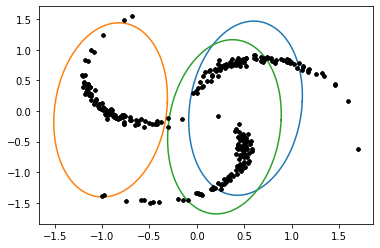

mpkl 0.0
likelihood -580.4390352281252
aic,bic 1182.8780704562505 1223.6196776774686


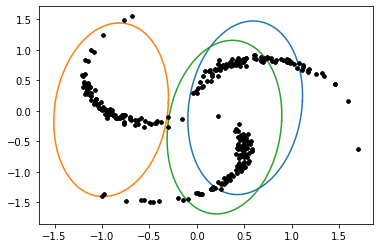

mpkl 0.0
likelihood -580.2387929945296
aic,bic 1182.4775859890592 1223.2191932102774


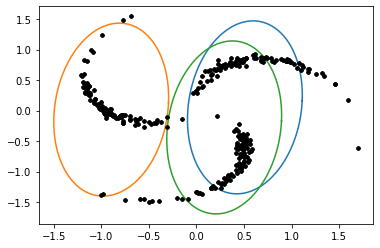

mpkl 0.0
likelihood -580.0434847519355
aic,bic 1182.086969503871 1222.828576725089


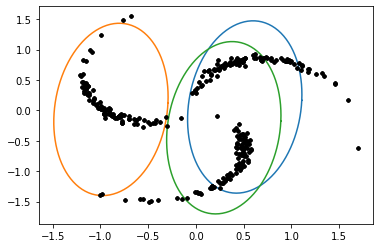

mpkl 0.0
likelihood -579.8865420223256
aic,bic 1181.7730840446511 1222.5146912658693


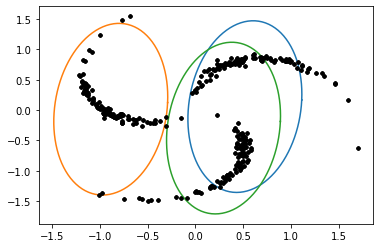

mpkl 0.0
likelihood -579.7208986433077
aic,bic 1181.4417972866154 1222.1834045078335


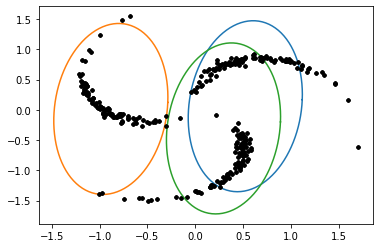

mpkl 0.0
likelihood -579.5622762620139
aic,bic 1181.1245525240279 1221.866159745246


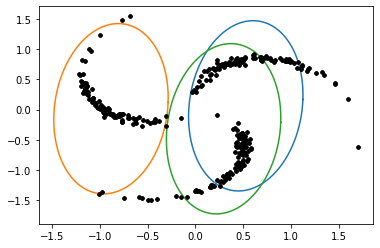

mpkl 0.0
likelihood -579.3909736987075
aic,bic 1180.781947397415 1221.5235546186332


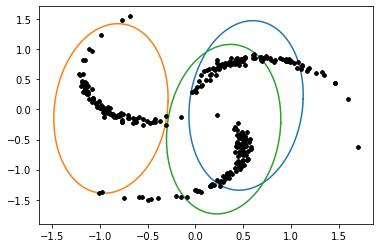

mpkl 0.0
likelihood -579.183746825154
aic,bic 1180.367493650308 1221.1091008715262


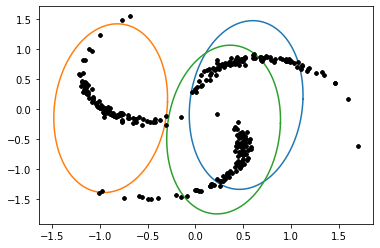

mpkl 0.0
likelihood -578.9605669819442
aic,bic 1179.9211339638885 1220.6627411851066


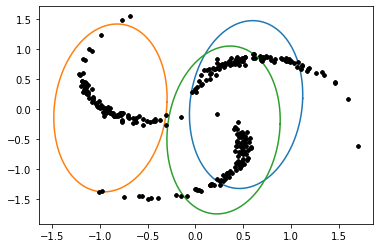

mpkl 0.0
likelihood -578.7249612076974
aic,bic 1179.449922415395 1220.191529636613


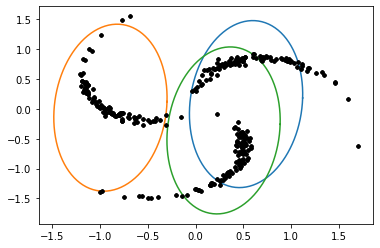

mpkl 0.0
likelihood -578.4843451649749
aic,bic 1178.9686903299498 1219.710297551168


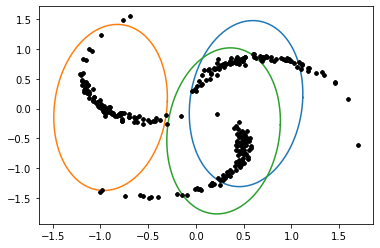

mpkl 0.0


In [7]:
for params in params_store:
    print("likelihood",test_GMM.likelihood(params))
    print("aic,bic",test_GMM.aic(params),test_GMM.bic(params))
    

    draw_clusters(test_GMM.unpack_params(params),data)
    kl_cov = []
    for log_proportion, mean, cov_sqrt in zip(*test_GMM.unpack_params(params)):
        kl_cov.append(cov_sqrt.T @ cov_sqrt)
    print("mpkl",test_GMM.print_mpkl(params['means'],kl_cov))

In [8]:
### Final labels

np.array(test_GMM.labels(data,params_store[-1]))

array([1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])